## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll further investigate how to tune your own logistic regression implementation, as well as that of scikit-learn in order to produce better models.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, you were able to verify your manual logistic regression model output using scikit-learn. However, that model did not include an intercept or any regularization. In this investigative lab, you will analyze the impact of these two tuning parameters.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
#Your code here
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implement a standard train-test split.  
**For consistency of results, use random_state=17.**

In [2]:
#Your code here
from sklearn.model_selection import train_test_split
X = df[df.columns[:-1]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
print(y_train.value_counts(), '\n', y_test.value_counts())

1.0    130
0.0     97
Name: target, dtype: int64 
 0.0    41
1.0    35
Name: target, dtype: int64


## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [7]:
# Your code here
import numpy as np

def sigmoid(x):
    x = np.array(x)
    return 1/(1+ np.e**(-1*x))

def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1], 1)).flatten()
    weights_col = pd.DataFrame(initial_weights)
    weights = initial_weights
    training_errors = []
    #Create a for loop of iterations
    for iteration in range(max_iterations):
        #Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X, weights))
        
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        
        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector) 
        
        #Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
    #Return finalized Weights
    return weights

In [8]:
weights = grad_desc(X_train, y_train, 50000, 0.001)

In [11]:
weights

array([ 0.77803589, -2.17904675,  2.60297636, -2.64293402, -2.41063551,
        0.02614971,  1.35662453,  6.73467316, -1.10155543, -3.92267119,
        0.71334478, -3.38851215, -1.78113387])

## Now use your algorithm to make [probability] predictions on the test set

In [9]:
#Your code here
yhat_test = sigmoid(np.dot(X_test, weights))
print([round(yi, 2) for yi in yhat_test])

[0.96, 0.02, 0.09, 0.12, 0.0, 1.0, 0.25, 0.94, 0.0, 0.8, 0.04, 0.69, 0.53, 0.0, 0.99, 0.59, 0.69, 0.01, 0.99, 0.03, 0.98, 0.98, 0.03, 0.78, 0.76, 0.78, 0.0, 0.08, 0.02, 0.01, 0.74, 0.02, 0.99, 0.05, 0.35, 0.99, 0.85, 0.31, 0.78, 0.99, 0.97, 0.14, 0.0, 0.01, 0.96, 0.9, 0.98, 0.73, 0.02, 0.0, 0.98, 0.0, 0.0, 0.68, 0.85, 0.0, 0.66, 0.6, 0.01, 0.97, 0.07, 0.0, 0.98, 0.43, 0.91, 0.08, 0.81, 0.99, 0.01, 0.26, 0.68, 0.18, 0.98, 0.02, 0.96, 0.94]


## Create an ROC curve for your predictions

AUC:  0.8996515679442508


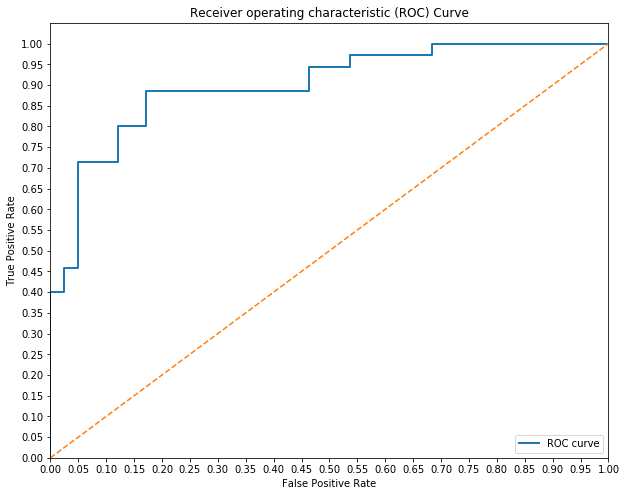

In [12]:
#Your code here
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresh = roc_curve(y_test, yhat_test)

print('AUC: ', auc(fpr, tpr))
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, lw=2, label='ROC curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

Test AUC:  0.8996515679442508
Train AUC:  0.9291038858049168


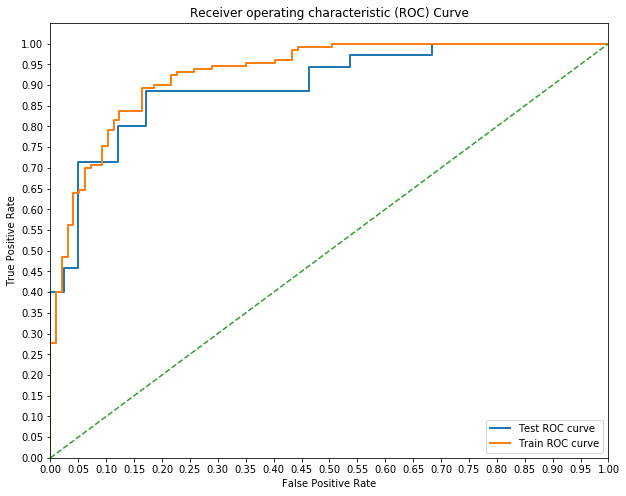

In [13]:
# Your code here
yhat_train = sigmoid(np.dot(X_train, weights))

fpr_test, tpr_test, thresh_test = roc_curve(y_test, yhat_test)
fpr_train, tpr_train, thresh_train = roc_curve(y_train, yhat_train)

print('Test AUC: ', auc(fpr_test, tpr_test))
print('Train AUC: ', auc(fpr_train, tpr_train))

plt.figure(figsize=(10,8))
plt.plot(fpr_test, tpr_test, lw=2, label='Test ROC curve')
plt.plot(fpr_train, tpr_train, lw=2, label='Train ROC curve')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterward, feel free to use the built-in scikit-learn methods to compute the confusion matrix as we discussed in previous sections.

In [16]:
# Your code here
import itertools

def binary_predict(probabilities, threshold=0.5):
    classes = []
    for p in probabilities:
        if p >= threshold:
            classes.append(1)
        else:
            classes.append(0)
    return classes

test_predictions = binary_predict(yhat_test)
# test_predictions

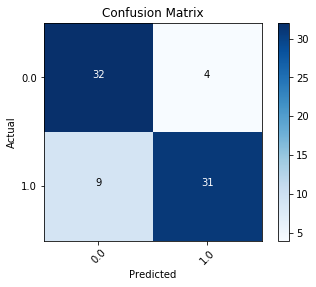

In [20]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_predictions, y_test)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

class_names = set(y)
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
            horizontalalignment = 'center',
            color='white' if cnf_matrix[i, j] > thresh else 'black')

plt.colorbar()
    

## Initial Model - scikit-learn

Do the same using the built-in method from scikit-learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [25]:
# Your code here
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Create an ROC Curve for the scikit-learn model

AUC:  0.8996515679442508


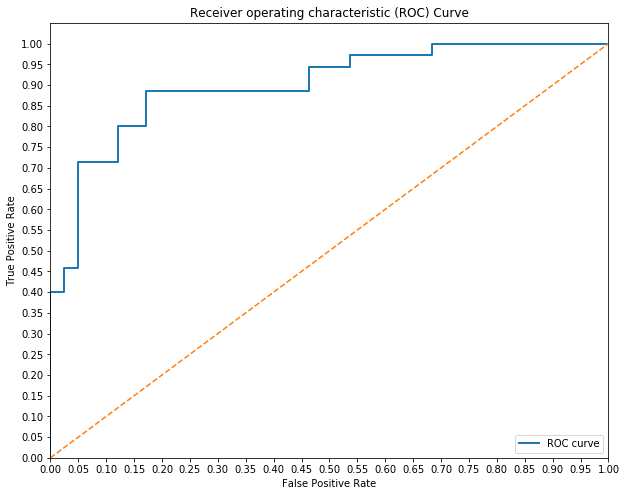

In [26]:
#Your code here
y_score = logreg.decision_function(X_test)
fpr, tpr, thresh = roc_curve(y_test, y_score)

print('AUC: ', auc(fpr, tpr))
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, lw=2, label='ROC curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## As before add an ROC curve to the graph for the train set as well

Test AUC:  0.8996515679442508
Train AUC:  0.9291038858049168


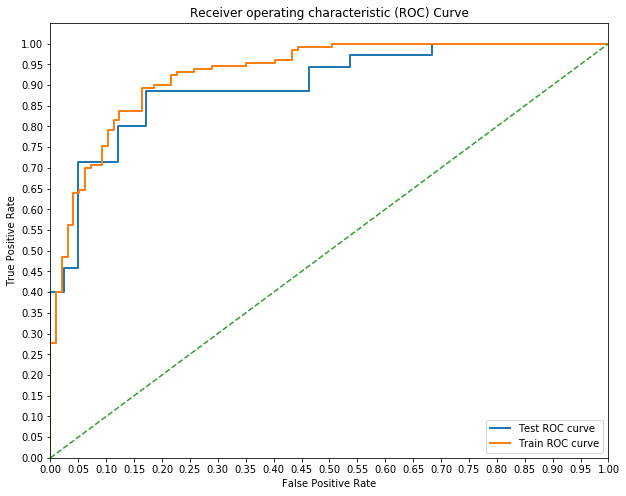

In [27]:
#Your code here
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

fpr_test, tpr_test, thresh_test = roc_curve(y_test, y_test_score)
fpr_train, tpr_train, thresh_train = roc_curve(y_train, y_train_score)

print('Test AUC: ', auc(fpr_test, tpr_test))
print('Train AUC: ', auc(fpr_train, tpr_train))

plt.figure(figsize=(10,8))
plt.plot(fpr_test, tpr_test, lw=2, label='Test ROC curve')
plt.plot(fpr_train, tpr_train, lw=2, label='Train ROC curve')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Adding an Intercept

Now add an intercept to the scikit-learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

Custom Test AUC:  0.8996515679442508
Custom Train AUC:  0.9291038858049168
Scikit Learn Test AUC:  0.8996515679442508
Scikit Learn Train AUC:  0.9291038858049168
Scikit Learn with Intercept Test AUC:  0.8989547038327527
Scikit Learn with Intercept Train AUC:  0.9325931800158604


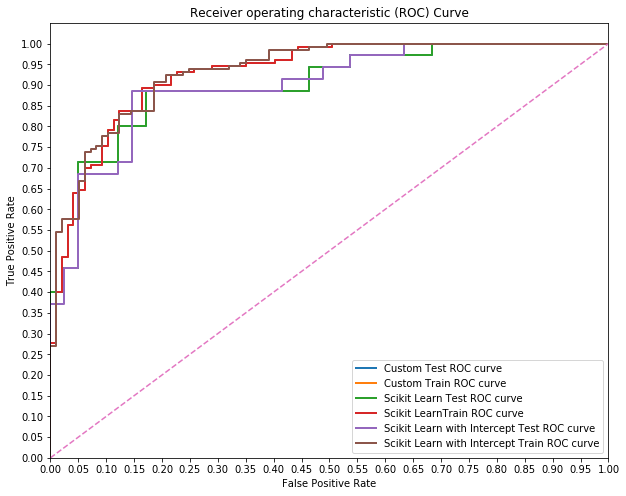

In [28]:
# Your code here
logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')
logregi.fit(X_train, y_train)

# custom
yhat_train = sigmoid(np.dot(X_train, weights))

fpr_test, tpr_test, thresh_test = roc_curve(y_test, yhat_test)
fpr_train, tpr_train, thresh_train = roc_curve(y_train, yhat_train)

print('Custom Test AUC: ', auc(fpr_test, tpr_test))
print('Custom Train AUC: ', auc(fpr_train, tpr_train))

plt.figure(figsize=(10,8))
plt.plot(fpr_test, tpr_test, lw=2, label='Custom Test ROC curve')
plt.plot(fpr_train, tpr_train, lw=2, label='Custom Train ROC curve')


# Scikit Learn
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

fpr_test, tpr_test, thresh_test = roc_curve(y_test, y_test_score)
fpr_train, tpr_train, thresh_train = roc_curve(y_train, y_train_score)

print('Scikit Learn Test AUC: ', auc(fpr_test, tpr_test))
print('Scikit Learn Train AUC: ', auc(fpr_train, tpr_train))

plt.plot(fpr_test, tpr_test, lw=2, label='Scikit Learn Test ROC curve')
plt.plot(fpr_train, tpr_train, lw=2, label='Scikit LearnTrain ROC curve')

# Scikit Learn with Intercept
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

fpr_test, tpr_test, thresh_test = roc_curve(y_test, y_test_score)
fpr_train, tpr_train, thresh_train = roc_curve(y_train, y_train_score)

print('Scikit Learn with Intercept Test AUC: ', auc(fpr_test, tpr_test))
print('Scikit Learn with Intercept Train AUC: ', auc(fpr_train, tpr_train))

plt.plot(fpr_test, tpr_test, lw=2, label='Scikit Learn with Intercept Test ROC curve')
plt.plot(fpr_train, tpr_train, lw=2, label='Scikit Learn with Intercept Train ROC curve')

# Formatting
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

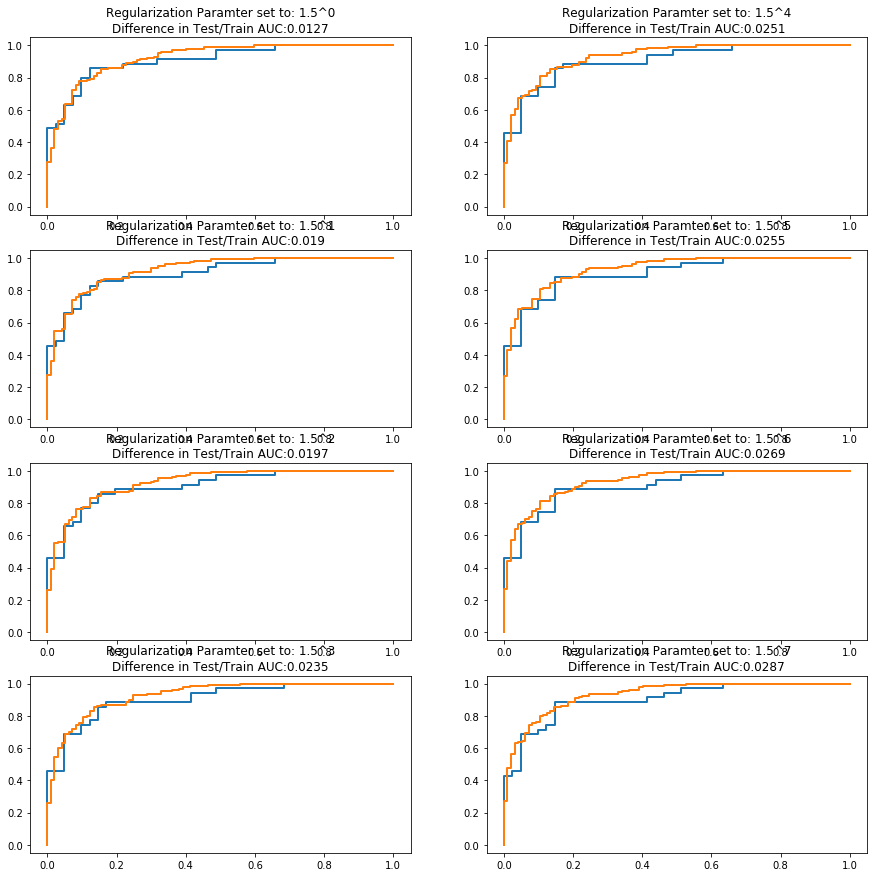

In [36]:
# Your code here
fig, axes = plt.subplots(4,2, figsize=(15,15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i,j]
    
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver='liblinear')
    logreg.fit(X_train, y_train)
    
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)
    
    fpr_test, tpr_test, thresh_test = roc_curve(y_test, y_test_score)
    fpr_train, tpr_train, thresh_train = roc_curve(y_train, y_train_score)

    test_auc = auc(fpr_test, tpr_test)
    train_auc = auc(fpr_train, tpr_train)
    auc_diff = round(train_auc - test_auc, 4)
    
    ax.plot(fpr_test, tpr_test, lw=2, label='Test ROC curve')
    ax.plot(fpr_train, tpr_train, lw=2, label='Train ROC curve')

    ax.set_title('Regularization Paramter set to: 1.5^{}\nDifference in Test/Train AUC:{}'.format(n, auc_diff))


In [32]:
1.5**8

25.62890625

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

#Your response here

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.